# CNN İLE BİSİKLET VE KAYKAY RESİM SINIFLANDIRMASI
Görüntülerin bisiklet mi yoksa kaykay mı olduğunu sınıflandıracağız. 
Verileri şu adresten indirin: https://drive.google.com/open?id=1Wf7NAl-Zp6PiVA9e4J1lw13sTIGzWwo8

Resimleri boyutlandırmak ve isimlendirmek için ilgili python kodlarına bu adresten ulaşabilirsiniz: https://drive.google.com/open?id=1r3VRv_f7MPBOnFETDRjoQFR2yj0xSh6A

Veri kümemiz 400 bisiklet ve kaykay resminden oluşuyor(Sınıf başına 200 resim). Her sınıfın 150 resmi train, 40 resmi validation ve 10 resmi test için ayrılmıştır. 


In [4]:
import os, shutil

#### Makinemiz üzerinde dataseti konumlandıracağımız klasörleri yarattık

In [5]:
base_dir = '/Users/enes/Desktop/dataset'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Eğitim verilerini içeren dizinleri oluşturuyoruz
train_bicycle_dir = os.path.join(train_dir, 'bicycle')
os.mkdir(train_bicycle_dir)
train_skateboard_dir = os.path.join(train_dir, 'skateboard')
os.mkdir(train_skateboard_dir)

# Validation verilerini içeren dizinleri oluşturuyoruz
validation_bicycle_dir = os.path.join(validation_dir, 'bicycle')
os.mkdir(validation_bicycle_dir)
validation_skateboard_dir = os.path.join(validation_dir, 'skateboard')
os.mkdir(validation_skateboard_dir)

# Test verilerini içeren dizinleri oluşturuyoruz
test_bicycle_dir = os.path.join(test_dir, 'bicycle')
os.mkdir(test_bicycle_dir)
test_skateboard_dir = os.path.join(test_dir, 'skateboard')
os.mkdir(test_skateboard_dir)

In [6]:
original_dataset_dir = '/Users/enes/Desktop/gorsel'
base_dir = '/Users/enes/Desktop/dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_bicycle_dir = os.path.join(train_dir, 'bicycle')
train_skateboard_dir = os.path.join(train_dir, 'skateboard')

validation_bicycle_dir = os.path.join(validation_dir, 'bicycle')
validation_skateboard_dir = os.path.join(validation_dir, 'skateboard')

test_bicycle_dir = os.path.join(test_dir, 'bicycle')
test_skateboard_dir = os.path.join(test_dir, 'skateboard')

#### Önceden isimlendirmiş olduğumuz verileri train-validation-test klasörlerine kopyalıyoruz

In [7]:
fnames = ['bicycle.{}.jpg'.format(i) for i in range(150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_bicycle_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['bicycle.{}.jpg'.format(i) for i in range(150, 190)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_bicycle_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['bicycle.{}.jpg'.format(i) for i in range(190, 200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_bicycle_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['skateboard.{}.jpg'.format(i) for i in range(150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_skateboard_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['skateboard.{}.jpg'.format(i) for i in range(150, 190)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_skateboard_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['skateboard.{}.jpg'.format(i) for i in range(190, 200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_skateboard_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('Train icin bisiklet resmi adeti:', len(os.listdir(train_bicycle_dir)))
print('Train icin kaykay resmi adeti:', len(os.listdir(train_skateboard_dir)))
print('Toplam train resim sayisi:', len(os.listdir(train_bicycle_dir)) + len(os.listdir(train_skateboard_dir)))
print()

print('Validation icin bisiklet resmi adeti:', len(os.listdir(validation_bicycle_dir)))
print('Validation icin kaykay resmi adeti:', len(os.listdir(validation_skateboard_dir)))
print('Toplam validation resim sayisi:', len(os.listdir(validation_bicycle_dir)) + len(os.listdir(validation_skateboard_dir)))
print()

print('Test icin bisiklet resmi adeti:', len(os.listdir(test_bicycle_dir)))
print('Test icin kaykay resmi adeti:', len(os.listdir(test_skateboard_dir)))
print('Toplam test resim sayisi:', len(os.listdir(test_bicycle_dir)) + len(os.listdir(test_skateboard_dir)))
print()

Train icin bisiklet resmi adeti: 150
Train icin kaykay resmi adeti: 150
Toplam train resim sayisi: 300

Validation icin bisiklet resmi adeti: 40
Validation icin kaykay resmi adeti: 40
Toplam validation resim sayisi: 80

Test icin bisiklet resmi adeti: 10
Test icin kaykay resmi adeti: 10
Toplam test resim sayisi: 20



#### Çizim işlemlerini gerçekleştirmek için matplotlib kütüphanemizi ve fonksiyonlarını oluşturuyoruz

In [9]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### ( İLK ADIM ) CNN-MaxPool ile eğitime başlıyoruz

In [10]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Piksel değerlerini [0, 1] ile [0, 255] arasında yeniden ölçeklendirir
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # train resimlerini 224 x 224 piksel değerinde boyutlandırıyoruz.
    batch_size=50,
    class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # validation resimlerini 224 x 224 piksel değerinde boyutlandırıyoruz.
    batch_size=50,
    class_mode='binary')

Found 300 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


#### Epoch değerini ve kaç resmi birlikte göreceği değerleri girip eğitimi başlatıyoruz

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 320 x 50 == 16000
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
320/320 [==============================] - 915s 3s/step - loss: 0.2237 - acc: 0.9111 - val_loss: 0.2277 - val_acc: 0.8875
Epoch 2/30
320/320 [==============================] - 910s 3s/step - loss: 0.0489 - acc: 0.9909 - val_loss: 0.0710 - val_acc: 0.9250
Epoch 3/30
320/320 [==============================] - 907s 3s/step - loss: 0.0436 - acc: 0.9939 - val_loss: 0.5935 - val_acc: 0.9125
Epoch 4/30
320/320 [==============================] - 909s 3s/step - loss: 0.0601 - acc: 0.9941 - val_loss: 0.4886 - val_acc: 0.9250
Epoch 5/30
320/320 [==============================] - 909s 3s/step - loss: 0.0264 - acc: 0.9982 - val_loss: 0.4648 - val_acc: 0.9125
Epoch 6/30
320/320 [==============================] - 911s 3s/step - loss: 0.0270 - acc: 0.9975 - val_loss: 0.1454 - val_acc: 0.9000
Epoch 7/30
320/320 [==============================] - 910s 3s/step - loss: 0.0216 - acc: 0.9983 - val_loss: 3.9015 - val_acc: 0.6625
Epoch 8/30
320/320 [==============================] - 908s 3s/step - 

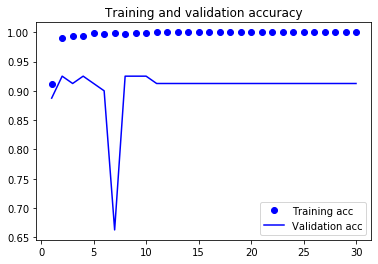

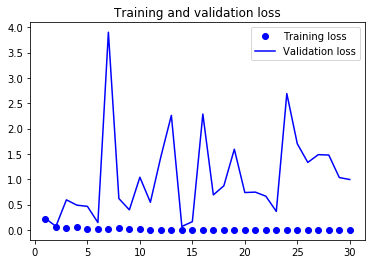

In [10]:
plot_accuracy_and_loss(history)

In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test acc: 0.949999988079071


### Eğitimin Yorumu:
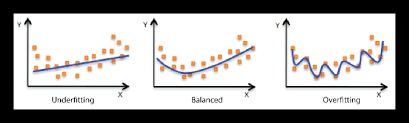
Eğitimi yorumlamak gerekirse genel olarak modelin overfit ettiğini grafikten anlamaktan mümkün. Dengesiz olan train-validation loss değerleri bize bunu söylüyor. Modelin overfit etmesinde verisetinin az olması büyük önem arz eder. Bizim veri kümemizde 400 tane resim bulunduğundan bunun oluşu kaçınılmazdır. 


### ( İKİNCİ ADIM ) Veri setimizi Data Augmentation yöntemi ile eğitiyoruz

In [28]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

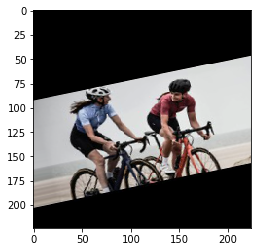

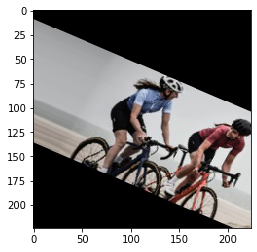

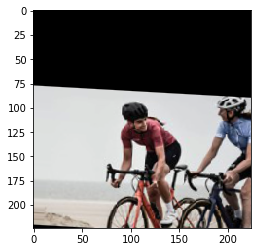

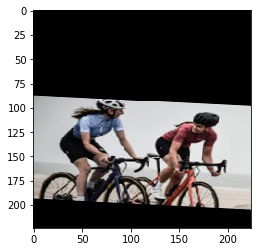

In [29]:
from keras.preprocessing import image

fnames = [os.path.join(train_bicycle_dir, fname) for fname in os.listdir(train_bicycle_dir)]

img_path = fnames[4] # Bir resim seciyoruz

img = image.load_img(img_path, target_size=(224, 224)) # resmi yukleyip yeniden boyutlandiriyoruz

x = image.img_to_array(img) # Numpy array i (224, 224, 3) sekline donusturuyoruz

x = x.reshape((1,) + x.shape)

# Rastgele donusturulmus resim gruplari olusturuyoruz
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### Augmentation edilmiş veriler eğitim görüntülerini her epoch için bir kereden fazla gösterir (3x epoch)
Amacımız resimlerde değişiklik yaparak az olan datasetimizin boyutunu arttırmak

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 300 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, # 960 x 50 = 48000 (Epoch basina birden fazla farklı augment edilmis resim gosteriyoruz)
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
960/960 [==============================] - 2882s 3s/step - loss: 0.2725 - acc: 0.8795 - val_loss: 0.1449 - val_acc: 0.8375
Epoch 2/30
960/960 [==============================] - 2757s 3s/step - loss: 0.0886 - acc: 0.9672 - val_loss: 1.1385 - val_acc: 0.9125
Epoch 3/30
960/960 [==============================] - 2755s 3s/step - loss: 0.0437 - acc: 0.9848 - val_loss: 0.2056 - val_acc: 0.9125
Epoch 4/30
960/960 [==============================] - 2757s 3s/step - loss: 0.0268 - acc: 0.9910 - val_loss: 1.2691 - val_acc: 0.9250
Epoch 5/30
960/960 [==============================] - 2756s 3s/step - loss: 0.0214 - acc: 0.9939 - val_loss: 0.1122 - val_acc: 0.9250
Epoch 6/30
960/960 [==============================] - 2752s 3s/step - loss: 0.0165 - acc: 0.9950 - val_loss: 1.4682 - val_acc: 0.9125
Epoch 7/30
960/960 [==============================] - 2757s 3s/step - loss: 0.0150 - acc: 0.9958 - val_loss: 1.8053 - val_acc: 0.9250
Epoch 8/30
960/960 [==============================] - 2756s 3s

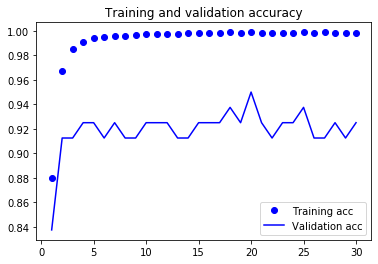

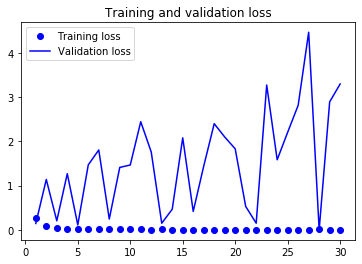

In [27]:
plot_accuracy_and_loss(history)

In [28]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test acc: 0.949999988079071


### Eğitimin Yorumu: 
Veri kümesinin az olmasından ötürü validasyon yapmak için 40 görsel ayrılmıştı. Data Augmentationun amacı elimizdeki veri kümesinin az olması durumunda verilerimizi sentetik olarak çoğaltarak daha iyi bir başarım sağlamaktır. Train and validation loss grafiğine baktığımızda yine unbalanced bir grafik ile karşı karşıyayız. Train and validation accuracy grafiğinde ise eğitim acc değerinin validation(doğrulama) değerinden daha yüksek olduğu durumu ortaya çıkıyor. Gerçek zamanda kullanılacak olan bu modelin train acc değerini vermeyeceği aşikar. Derin öğrenme modellerinde accuracy değerinin 1.0 olması imkansıza yakın bir durumdur. Bir önceki cnn-maxpool eğitimine göre daha iyi bir sonuç ettik ama yine de sonuç tatminkar değil.



### ( ÜÇÜNCÜ ADIM ) Data Augmentation eğitimimize Dropout ekleyerek deneyi tekrarlıyoruz

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout eklendi
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 300 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [21]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, # 960 x 50 = 48000 (Epoch basina birden fazla farklı augment edilmis resim gosteriyoruz)
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
960/960 [==============================] - 2820s 3s/step - loss: 0.2613 - acc: 0.8837 - val_loss: 0.0676 - val_acc: 0.9250
Epoch 2/30
960/960 [==============================] - 2853s 3s/step - loss: 0.0918 - acc: 0.9659 - val_loss: 0.3046 - val_acc: 0.8750
Epoch 3/30
960/960 [==============================] - 3361s 4s/step - loss: 0.0466 - acc: 0.9838 - val_loss: 1.3418 - val_acc: 0.9125
Epoch 4/30
960/960 [==============================] - 2824s 3s/step - loss: 0.0282 - acc: 0.9909 - val_loss: 0.4546 - val_acc: 0.9125
Epoch 5/30
960/960 [==============================] - 2743s 3s/step - loss: 0.0203 - acc: 0.9934 - val_loss: 1.7975 - val_acc: 0.8625
Epoch 6/30
960/960 [==============================] - 2745s 3s/step - loss: 0.0149 - acc: 0.9951 - val_loss: 1.4972 - val_acc: 0.8875
Epoch 7/30
960/960 [==============================] - 2747s 3s/step - loss: 0.0140 - acc: 0.9959 - val_loss: 2.1754 - val_acc: 0.9250
Epoch 8/30
960/960 [==============================] - 2748s 3s

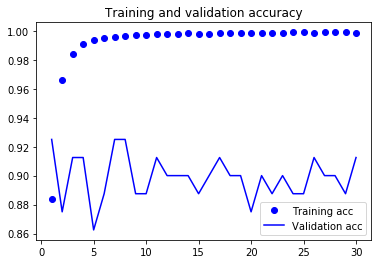

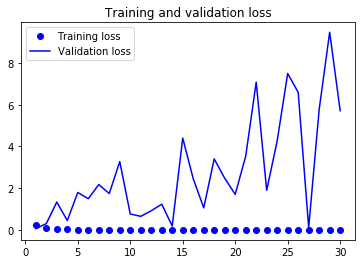

In [22]:
plot_accuracy_and_loss(history)

In [23]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test acc: 0.949999988079071


### Eğitim Yorumu: 
Tam bağlı katmanlarda belli eşik değerin altındaki düğümlerin seyreltilmesinin başarımı arttırdığı gözlenmiştir. Bu yüzden eğitimimizi Dropout ekleyerek tekrarladık.Dropout değeri yaygın olarak 0.5 olarak kullanılmaktadır. Biz de eğitimimizde bu değeri değiştirmemeyi seçtik. Train loss, eğitim veri setindeki hatadır. Train loss, eğitimli ağ üzerinden veri doğrulama seti çalıştırıldıktan sonraki hatadır. Train/Validation ikisi arasındaki orandır.

Beklenmedik şekilde, dönemler hem doğrulama hem de eğitim hatası düşüşünü artırdıkça. Ancak belli bir noktada, eğitim hatası düşmeye devam ederken (ağ verileri daha iyi ve daha iyi öğrenir) validaiton loss artmaya başlar - buna overfitting(aşırı uyum) denir. Bizim oluşturduğumuz grafiğe baktımızda modelimiz Dropout eklenmeden önceki haline göre çok daha iyi durumdadır.

### ( DÖRDÜNCÜ ADIM ) EARLY STOPING - ERKEN EPOCH KESME DENEYİ
Data Augmentation + Dropout ile gerçeklenen deneyimizde modelin aşırı uyum sağladığı görülmüştür. Train loss ve Validation arasındaki farkın açılması overfitting in başladığı anlama gelir. Epoch sonuçlarını tek tek incelediğimizde 4. Epochtan itibaren overfitting başlamıştır. Bu deneyimizde erken epoch kesmenin sonuçlarını inceleyeceğiz.

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout eklendi
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 300 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, # 960 x 50 = 48000 (Epoch basina birden fazla farklı augment edilmis resim gosteriyoruz)
    epochs=4, # Erken Epoch kesmek icin epoch degeri 4'e ayarlandi
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/4
960/960 [==============================] - 3071s 3s/step - loss: 0.2695 - acc: 0.8802 - val_loss: 0.9648 - val_acc: 0.8000
Epoch 2/4
960/960 [==============================] - 2912s 3s/step - loss: 0.0859 - acc: 0.9685 - val_loss: 0.3033 - val_acc: 0.8875
Epoch 3/4
960/960 [==============================] - 2744s 3s/step - loss: 0.0444 - acc: 0.9846 - val_loss: 0.3423 - val_acc: 0.9125
Epoch 4/4
960/960 [==============================] - 3281s 3s/step - loss: 0.0276 - acc: 0.9913 - val_loss: 1.2060 - val_acc: 0.9250


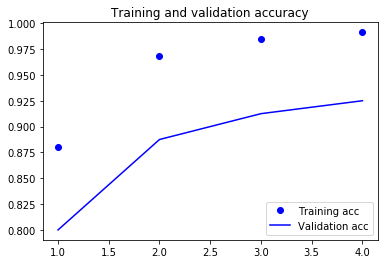

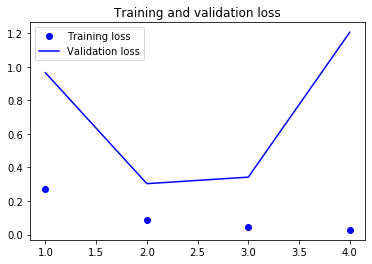

In [15]:
plot_accuracy_and_loss(history)

In [16]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test acc: 0.8999999761581421


### Eğitim Yorumu:
Erken epoch kesme safhasından sonra Test acc değeri düşmesine rağmen Validation 
acc ye daha yakın sonuçlar çıkmıştır. Modelimizde kaynaklanan bu sıkıntıların temelinde veri setimizin yeterli boyuta ve çeşitliliğe sahip olmamasıdır. 


## Sonuç:
Eğitimlerimizi tamamladığımızda anlıyoruz ki, Derin Öğrenme modelleri çok fazla GPU gücü isteyen(Benim eğitimlerimin her biri 1 gün sürdü), veri setinde zenginlik arayan bir öğrenme şekli. Şayet yeterli veri setinin olmayışı modelimizi çabucak aşırı ezberlemeye götürdü. Birçok başarım arttırım tekniği uygulasak da gerçek hayat problemlerinde kullanabileceğimiz tatmin edici sonuçlar alamadık. Eğer elimizde yeterli verimiz yok veyahut genişletecek zaman,imkan yok ise Transfer Learning modellerinin kullanımı daha başarılı olacaktır. 
